<a href="https://colab.research.google.com/github/Yelitza22/Investigaci-n-de-operaciones-I/blob/main/TareadeMaximizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Investigación de Operaciones I
Autor: Marai Yelitza Olvera Oliva

**Maximizar** $ z = 4x_1 + x_2 $  
**Sujeto a:**


$3x_1 + x_2 = 3$ \\
$4x_1 + 3x_2 \geq 6$ \\
$x_1 + 2x_2 \leq 4 $ \\
$x_1 \geq 0$ \\
$x_2 \geq 0$



Para resolverlo, haremos uso de la librería numpy para las operaciones matemáticas y la libreria scipy, que es una extensión de numpy y nos ayudará a optimizar el problema dado, así:


In [7]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt


Escribamos ahora los coeficientes de la función objetivo, es decir la función
$z= 4x_1 + x_2$

In [8]:
# Coeficientes de la función objetivo
c = [4, 1]  # 4*x1 + 1*x2

Ahora escribamos como una matriz los coeficientes de las restricciones

In [40]:
# Matriz de coeficientes para las restricciones
A = [
    [3, 1],      # 3x1 + x2 <= 3
    [-3, -1],    # -3x1 - x2 <= -3
    [-4, -3],    # -4x1 - 3x2 <= -6
    [1, 2]       # x1 + 2x2 <= 4
]

Y hagamos lo mismo para los límites de las restricciones


In [ ]:
# Vector de límites de las restricciones
b = [3, -3, -6, 4]

Definamos ahora los limites de las variables $x_1$ y $x_2$, para ello, usaremos la expresión (0, None) que indica que la variable tiene un límite inferior de 0, pero no tiene límite superior, así

In [52]:
x1_bounds = (0, None)
x2_bounds = (0, None)

Usaremos la siguiente linea de codigo para resolver el problema de programación lineal. Dado que nuestro problema implica maximizar, utilizaremos la función linprog de la librería Scipy para optimizar la función dada, así

In [51]:
model_linear = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds])

Las siguientes dos líneas de codigo, sirven para imprimir el resultado del modelo lineal, ambas con una pequeña diferencia:

Al usar str, convierte  el objeto ***model_linear*** a una cadena de texto (con **str()**), y luego lo imprime.

In [48]:
print(str(model_linear))

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.4
              x: [ 4.000e-01  1.800e+00]
            nit: 0
          lower:  residual: [ 4.000e-01  1.800e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.400e+00 -0.000e+00 -2.000e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


Imprime el objeto ***model_linear*** directamente, lo cual muestra una representación detallada de los resultados del modelo.

In [49]:
print(model_linear)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.4
              x: [ 4.000e-01  1.800e+00]
            nit: 0
          lower:  residual: [ 4.000e-01  1.800e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.400e+00 -0.000e+00 -2.000e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


Lo siguiente es para pedir el tipo de variable que es ***model_linear***

In [50]:
type(model_linear)

scipy.optimize._optimize.OptimizeResult

A continuación, se muestra la gráfica de las restricciones para ilustrar más el problema resuelto

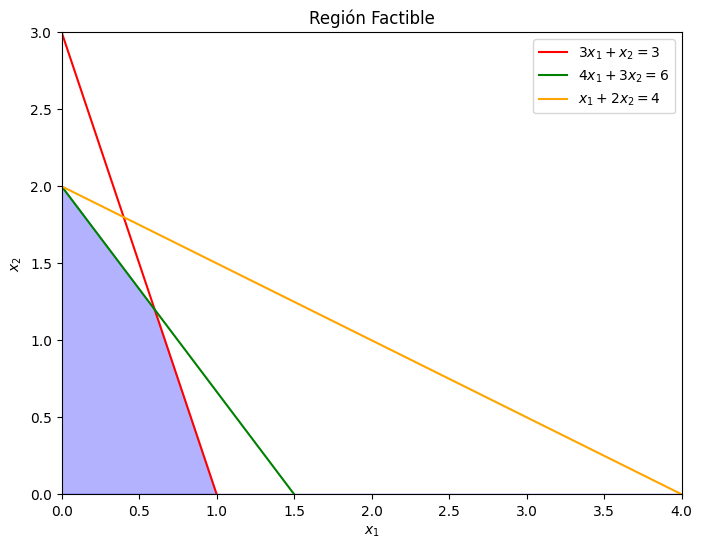

In [38]:
# Valores para x1 en el rango positivo
x1 = np.linspace(0, 5, 200)

# Restricciones en función de x1
y1 = (3 - 3*x1) / 1   # 3x1 + x2 = 3 (interpretado como ≤ para la región factible)
y2 = (6 - 4*x1) / 3   # 4x1 + 3x2 ≥ 6 (interpretado como ≥ en la región factible)
y3 = (4 - 1*x1) / 2   # x1 + 2x2 ≤ 4

# Configuración de la gráfica
plt.figure(figsize=(8, 6))

# Graficamos las restricciones en el cuadrante positivo (x1 ≥ 0 y x2 ≥ 0)
plt.plot(x1, y1, label=r'$3x_1 + x_2 = 3$', color='red')
plt.plot(x1, y2, label=r'$4x_1 + 3x_2 = 6$', color='green')
plt.plot(x1, y3, label=r'$x_1 + 2x_2 = 4$', color='orange')

# Colorear la región factible
plt.fill_between(x1, 0, np.minimum(np.minimum(y1, y3), np.maximum(y2, 0)), color='blue', alpha=0.3)

# Limitar la vista al primer cuadrante (x1 ≥ 0, x2 ≥ 0)
plt.xlim(0, 4)
plt.ylim(0, 3)

# Etiquetas de los ejes y título
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Región Factible")
plt.legend(loc='upper right')
plt.show()
